<a href="https://colab.research.google.com/github/gokul-ml2ds/ML-Practice/blob/main/CreditCardRisk(LR_%2B_XGBOOST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [399]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [367]:
df = pd.read_csv("creditcard.csv")

In [368]:
df.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [369]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [370]:
df.dropna(axis = 0, inplace = True)

In [96]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [371]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [372]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [373]:
from sklearn.preprocessing import StandardScaler
df = StandardScaler().fit_transform(X)

In [374]:
X = pd.DataFrame(df)

In [375]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


In [378]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 5)

In [379]:
X_train.shape

(199364, 29)

In [380]:
X_test.shape

(85443, 29)

In [381]:
print(y_train.shape)
print(y_test.shape)

(199364,)
(85443,)


In [382]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [130]:
y_pred = lr.predict(X_test)

In [137]:
lr.score(X_test, y_test)*100

99.91807403766254

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


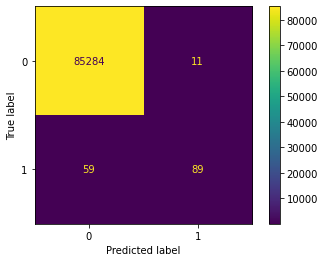

In [163]:
from sklearn.metrics import mean_squared_error,plot_confusion_matrix,precision_score, recall_score, f1_score, accuracy_score

plot_confusion_matrix(lr,X_test,y_test)

In [166]:
print("The MSE is : %.5f" %mean_squared_error(y_test,y_pred))

The MSE is : 0.00082


In [180]:
89/(89+59)

0.6013513513513513

In [179]:
print("The accuracy is %.2f"  %float(accuracy_score(y_test,y_pred)*100)+ " %")
print("The recall is %.3f"  %recall_score(y_test,y_pred))
print("The precision is %.3f"  %precision_score(y_test,y_pred))
print("The f1score is %.3f"  %f1_score(y_test,y_pred))

The accuracy is 99.92 %
The recall is 0.601
The precision is 0.890
The f1score is 0.718


In [ ]:
# high accuracy and low recall:
# recall = tp/tp+fn

## The dataset was imbalanced, lets try again with balanced dataset

In [345]:
df = pd.read_csv("creditcard.csv")

In [346]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [347]:
#Drop the "Time" column and the rows with null values
df.drop("Time",inplace = True, axis =1)
df.dropna(axis = 0, inplace = True)

In [348]:
len(df)

284807

In [349]:
df_train = df.iloc[:140000,:]
df_test = df.iloc[140000:,:]

In [350]:
df_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139995,-1.439699,0.910578,1.173417,1.817308,0.410812,0.038178,0.781843,0.135915,-1.499023,0.613433,...,0.125538,0.600411,0.203860,0.009068,-0.055673,-0.040086,-0.281079,-0.251310,72.64,0
139996,1.181470,0.228772,0.711923,0.694249,-0.540472,-0.824780,0.003427,-0.108522,-0.015411,-0.114137,...,-0.193804,-0.520469,0.231011,0.604835,0.078431,0.090918,-0.010827,0.021140,0.89,0
139997,-0.938277,0.321597,1.773311,-0.364477,0.998407,-1.080039,0.571964,-0.140942,-0.617672,-0.536990,...,-0.152298,-0.569172,-0.024422,0.275214,-0.195911,-0.093924,-0.143954,-0.104495,2.69,0
139998,-1.403967,-0.948657,0.138207,-1.682990,0.550497,-0.673966,0.909046,-0.043750,0.893394,-1.316072,...,0.160474,0.587251,-0.083505,-0.284967,-0.216130,-0.802553,0.208929,0.157702,220.84,0


In [351]:
df_1 = df_train[df_train["Class"]==1]
df_0 = df_train[df_train["Class"]==0]

In [352]:
len(df_1),len(df_0)

(264, 139736)

In [353]:
#Since we have only 492 cases of creditcard risk, we need to balance the dataset
df_0 = df_0.sample(len(df_1))
len(df_0)

264

In [354]:
df_train = df_0.append(df_1).sample(frac=1)
df_train.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
82327,1.116070,-1.008230,0.006871,-1.680585,-0.567848,0.437021,-0.648185,0.170455,1.792726,-1.042672,...,0.124515,0.323499,-0.437029,-1.306557,0.640519,0.190819,0.016208,0.016783,125.00,0
116832,-1.869326,-0.286573,0.880170,-1.330537,0.687680,0.723340,0.701561,-0.531645,-0.327222,1.547372,...,-0.621852,-0.570887,-0.368183,-1.145162,-0.133307,0.093319,-1.591464,-0.670018,48.00,0
18005,0.433157,-1.781804,0.612494,-0.864958,-1.777914,-0.612653,-0.187223,-0.077473,1.802164,-1.396658,...,0.417963,0.632236,-0.359836,0.711050,0.209576,0.068171,-0.009053,0.094384,396.00,0
20963,-3.151183,-1.110894,2.131186,0.536280,0.048715,-0.400256,-0.098679,0.440111,0.319844,-0.291282,...,-0.088252,0.470594,0.758572,0.309622,0.709580,-0.440694,0.008291,-0.177852,100.55,0
67909,1.182269,0.357837,0.278679,1.067354,-0.004100,-0.470073,0.222487,-0.154631,-0.174898,-0.063440,...,0.072881,0.318338,-0.090449,0.114619,0.645117,-0.303184,0.034893,0.020889,14.52,0


In [355]:
X_train = df_train.iloc[:,:-1]
X_test = df_test.iloc[:,:-1]
y_train = df_train.iloc[:,-1]
y_test = df_test.iloc[:,-1]

In [356]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [357]:
lr1 = LogisticRegression()
lr1.fit(X_train,y_train)
y_pred = lr1.predict(X_test)

In [358]:
print("The accuracy is %.2f"  %float(accuracy_score(y_test,y_pred)*100)+ " %")
print("The recall is %.3f"  %recall_score(y_test,y_pred))
print("The precision is %.3f"  %precision_score(y_test,y_pred))
print("The f1score is %.3f"  %f1_score(y_test,y_pred))

The accuracy is 13.25 %
The recall is 0.996
The precision is 0.002
The f1score is 0.004


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


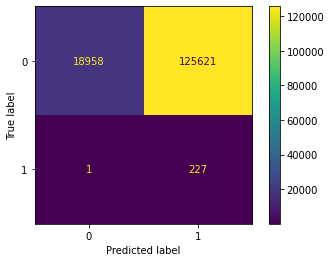

In [359]:
plot_confusion_matrix(lr1,X_test,y_test)

In [383]:
import xgboost as xgb
xg_mod = xgb.XGBClassifier()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.01,0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}

In [389]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(xg_mod,parameters,n_jobs =5,cv = 3,scoring='recall',refit=True)
clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.01, 0.05], 'max_depth': [6],
                         'min_child_weight': [11], 'missing': [-999],
                         'n_estimators': [5], 'nthread': [4],
                         'objective': ['binary:logistic'], 'seed': [1337],
                         'silent': [1], 'subsample': [0.8]},
             scoring='recall')

In [395]:
clf.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 6,
 'min_child_weight': 11,
 'missing': -999,
 'n_estimators': 5,
 'nthread': 4,
 'objective': 'binary:logistic',
 'seed': 1337,
 'silent': 1,
 'subsample': 0.8}

In [396]:
from sklearn.metrics import classification_report

In [397]:
grid_pred = clf.predict(X_test) 
print(classification_report(y_test, grid_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.70      0.78       148

    accuracy                           1.00     85443
   macro avg       0.94      0.85      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [398]:
print("The accuracy is %.2f"  %float(accuracy_score(y_test,grid_pred)*100)+ " %")
print("The recall is %.3f"  %recall_score(y_test,grid_pred))
print("The precision is %.3f"  %precision_score(y_test,grid_pred))
print("The f1score is %.3f"  %f1_score(y_test,grid_pred))

The accuracy is 99.93 %
The recall is 0.696
The precision is 0.880
The f1score is 0.777
